# Confusion Matrix

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from blendhunter.config import BHConfig
from blendhunter.performance import get_acc

In [2]:
bhconfig = BHConfig(config_file='../data/bhconfig.yml').config
out_path = bhconfig['out_path']
noise_sigma = bhconfig['noise_sigma']
n_noise_real = bhconfig['n_noise_real']
cosmos_range = bhconfig['cosmos_sample_range'][1]

In [3]:
!pwd

/media/vitorelli/1028E33828E31C0A/deblending/notebooks


In [4]:
n_noise_real

10

In [5]:
preds = []
for sigma in noise_sigma:
    all_noise_real = []
    for n in range(n_noise_real):
        x = np.load(f"../cosmos_results_pad/preds{sigma}{n}.npy")
        all_noise_real.append(x)
        
    preds.append(all_noise_real)

In [6]:
mean_true_positives = []
mean_false_negatives = []
mean_false_positives = []
mean_true_negatives  = []

std_true_positives = []
std_false_negatives = []
std_false_positives = []
std_true_negatives  = []

for i, predset in enumerate(preds):
    true_positives = []
    false_negatives = []
    false_positives = []
    true_negatives = []
    for pred in predset:
        truepos = pred[:len(pred)//2]
        trueneg = pred[len(pred)//2:]

        true_positives.append(len(truepos[truepos=='blended'])/(len(pred)))
        false_negatives.append(len(truepos[truepos=='not_blended'])/(len(pred)))
        false_positives.append(len(trueneg[trueneg=='blended'])/(len(pred)))
        true_negatives.append(len(trueneg[trueneg=='not_blended'])/(len(pred)))
    
    true_positives = np.array(true_positives)
    false_negatives = np.array(false_negatives)
    false_positives = np.array(false_positives)
    true_negatives = np.array(true_negatives)
    
    mean_true_positives.append(np.mean(true_positives))
    mean_false_negatives.append(np.mean(false_negatives))
    mean_false_positives.append(np.mean(false_positives))
    mean_true_negatives.append(np.mean(true_negatives))

    std_true_positives.append(np.std(true_positives))
    std_false_negatives.append(np.std(false_negatives))
    std_false_positives.append(np.std(false_positives))
    std_true_negatives.append(np.std(true_negatives))

    
    print (f'Mean(std) Confusion Matrix sigma={noise_sigma[i]}   ', 'Predicted blend      ', 'predicted not blend')
    print('Blended',f'                               {np.mean(true_positives):.3f}'+f'({np.std(true_positives):.3f})',
          f'            {np.mean(false_negatives):.3f}'+f'({np.std(false_negatives):.3f})')
    print('Not blended',f'                           {np.mean(false_positives):.3f}'+f'({np.std(false_positives):.3f})',
          f'            {np.mean(true_negatives):.3f}'+f'({np.std(true_negatives):.3f})')
    print()

Mean(std) Confusion Matrix sigma=5    Predicted blend       predicted not blend
Blended                                0.380(0.009)             0.120(0.009)
Not blended                            0.011(0.002)             0.489(0.002)

Mean(std) Confusion Matrix sigma=10    Predicted blend       predicted not blend
Blended                                0.460(0.005)             0.040(0.005)
Not blended                            0.028(0.007)             0.472(0.007)

Mean(std) Confusion Matrix sigma=15    Predicted blend       predicted not blend
Blended                                0.472(0.003)             0.028(0.003)
Not blended                            0.040(0.008)             0.460(0.008)

Mean(std) Confusion Matrix sigma=20    Predicted blend       predicted not blend
Blended                                0.475(0.004)             0.025(0.004)
Not blended                            0.054(0.013)             0.446(0.013)

Mean(std) Confusion Matrix sigma=25    Predicted blend   

## SEP

In [7]:
!pwd

/media/vitorelli/1028E33828E31C0A/deblending/notebooks


In [8]:
sepreds = np.load(f"../sep_pad_results/cosmos_flags.npy",allow_pickle=True)

In [9]:
sep_truepos = sepreds[:len(sepreds)//2]
sep_trueneg = sepreds[len(sepreds)//2:]

sep_true_positives = len(sep_truepos[sep_truepos==1])/(len(sepreds))
sep_false_negatives = len(sep_truepos[sep_truepos==0])/(len(sepreds))
sep_false_positives = len(sep_trueneg[sep_trueneg==1])/(len(sepreds))
sep_true_negatives = len(sep_trueneg[sep_trueneg==0])/(len(sepreds))
sep_positive_miss = len(sep_trueneg[sep_trueneg>1])/(len(sepreds))
sep_negative_miss = len(sep_trueneg[sep_trueneg>1])/(len(sepreds))
print (f'Confusion Matrix               ',
       'Predicted blend      ', 
       'predicted not blend     ',
       'Misidentification')
print('Blended                               ',
      f'{sep_true_positives:.3f}                ',
      f'{sep_false_negatives:.3f}                 ',
      f'{sep_positive_miss:.4f}')
                                         
print('Not blended                           ',
      f'{sep_false_positives:.3f}                ',
      f'{sep_true_negatives:.3f}                 ',
      f'{sep_negative_miss:.4f}')

Confusion Matrix                Predicted blend       predicted not blend      Misidentification
Blended                                0.433                 0.067                  0.0014
Not blended                            0.020                 0.479                  0.0014


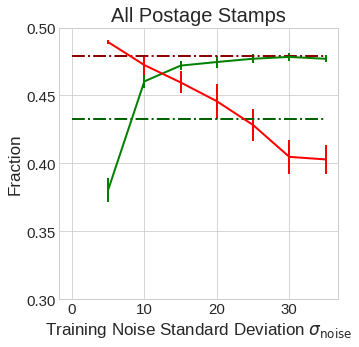

In [18]:
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(5,5))
plt.errorbar(noise_sigma,mean_true_positives,yerr=std_true_positives,color='g',linestyle='-',label="BH, True Positives", linewidth=2)
plt.errorbar(noise_sigma,mean_true_negatives,yerr=std_true_negatives,color='r',linestyle='-',label="BH, True Negatives", linewidth=2)
plt.plot([0,35],[sep_true_positives,sep_true_positives],color='darkgreen',linestyle='-.',label="SEP, True Positives", linewidth=2)
plt.plot([0,35],[sep_true_negatives,sep_true_negatives],color='darkred',linestyle='-.',label="SEP, True Negatives", linewidth=2)

#plt.plot([14.5,14.5],[0.4,.5],'k',alpha=0.5,label="Target images mean SNR")


plt.ylim(.3,.5)
plt.xlabel("Training Noise Standard Deviation $\sigma_\mathrm{noise}$",fontsize=17)
plt.ylabel("Fraction",fontsize=17)

#plt.legend(fontsize=15,frameon=True,fancybox=True)
plt.yticks([0.3,.35,.4,.45,.5])
plt.tick_params(labelsize=15)
plt.title("All Postage Stamps",fontsize=20)
plt.savefig("confusion_all.pdf",bbox_inches='tight')

## SEP mis-id

In [12]:
all_images = np.load("all_images_cosmos.npy",allow_pickle=True)

In [13]:
rejected_sep=np.arange(len(sepreds))[sepreds>1]

In [14]:
len(rejected_sep)

118

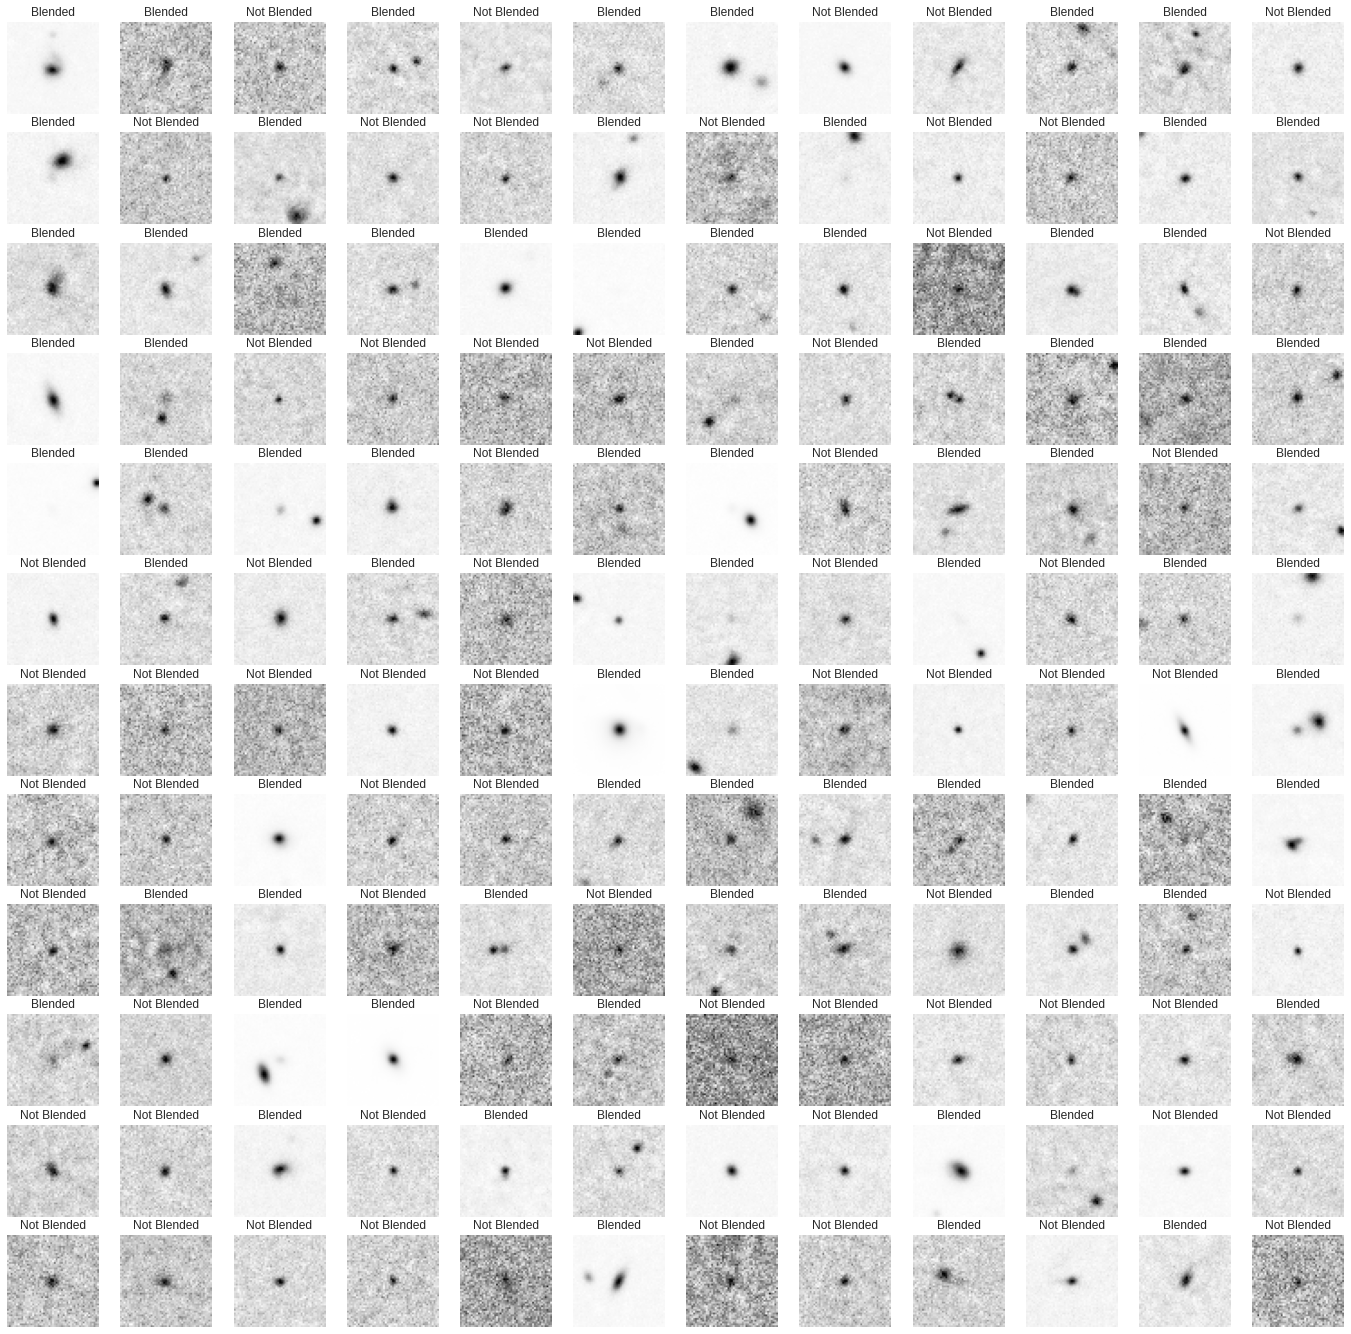

In [15]:
plt.figure(figsize=(24,24))
for i,reject in enumerate(np.random.randint(0,80000,144)):
    sub = plt.subplot(12,12,i+1)
    sub.imshow(all_images[reject])    
    
    true_label = 'Blended'
    if reject>40000:
        true_label = "Not Blended"
    
    plt.title(true_label)
    sub.axis('off')
plt.savefig('random_stamps.png',bbox_inches="tight")

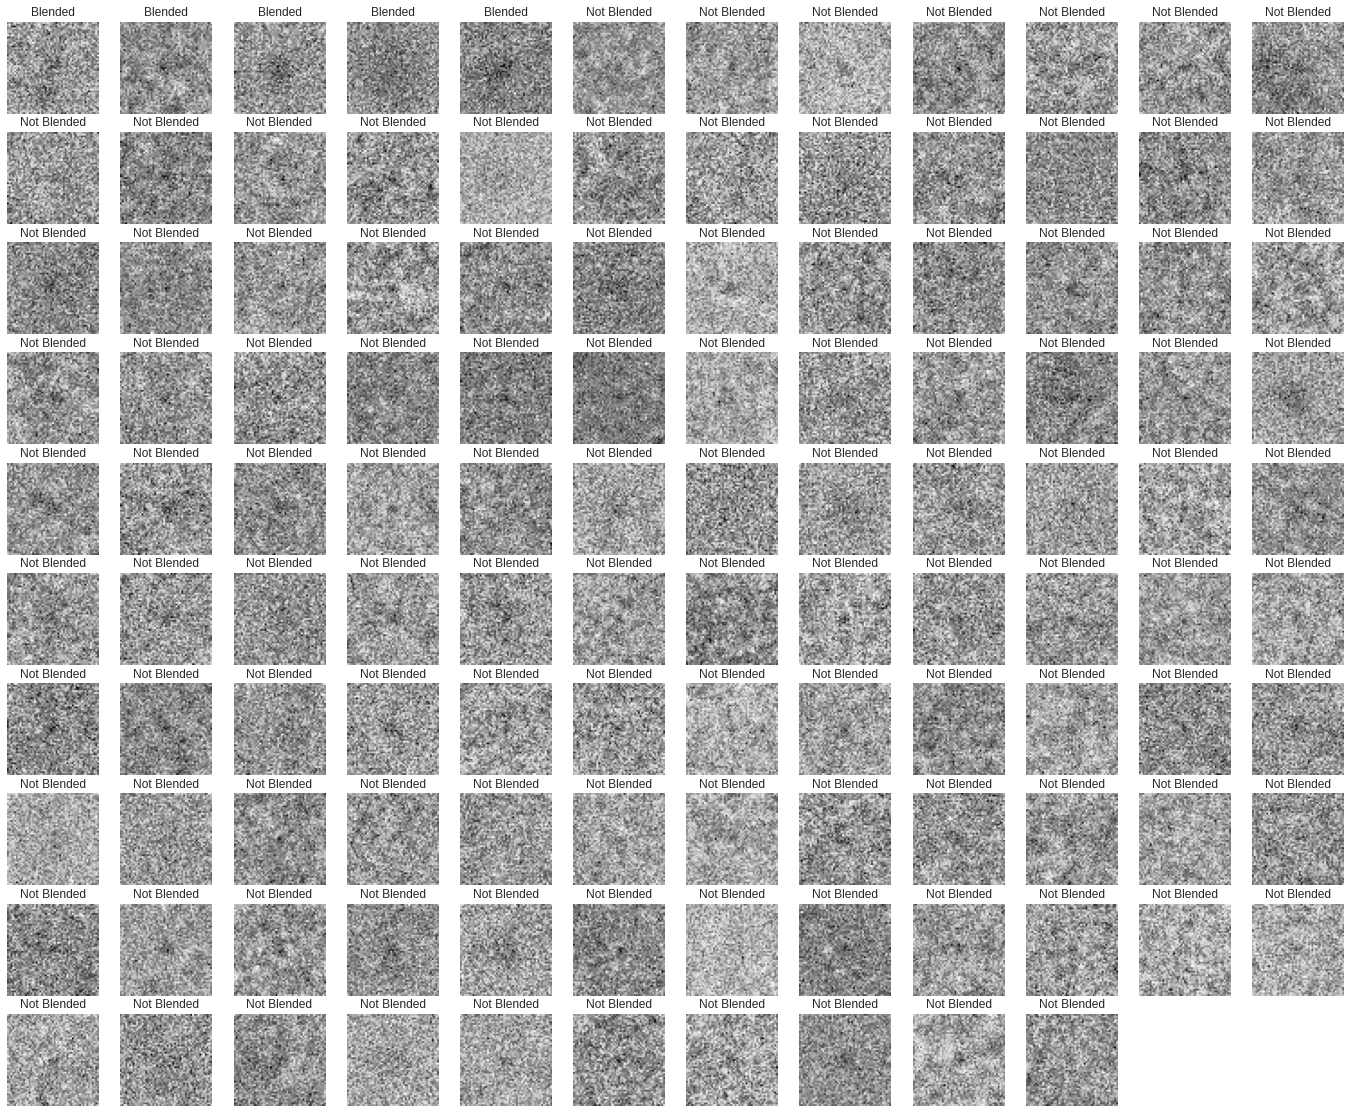

In [16]:
plt.figure(figsize=(24,24))
for i,reject in enumerate(np.arange(len(sepreds))[sepreds>1]):
    sub = plt.subplot(12,12,i+1)
    sub.imshow(all_images[reject])    
    
    true_label = 'Blended'
    if reject>40000:
        true_label = "Not Blended"
    
    plt.title(true_label)
    sub.axis('off')
plt.savefig('sep_rejected_stamps.png',bbox_inches="tight")

In [ ]:
not_blended = np.load("../axel_sims/not_blended/gal_obj_0.npy",allow_pickle=True)

In [ ]:
blended[0]['galsim_image'][0].array

In [ ]:
all_train_images = [stamp['galsim_image'][0].array for stamp in blended] + [ stamp['galsim_image'][0].array for stamp in not_blended] 

In [ ]:
plt.figure(figsize=(24,24))
for i,reject in enumerate(np.arange(len(sepreds))[sepreds>1]):
    sub = plt.subplot(12,12,i+1)
    sub.imshow(all_train_images[reject])    
    
    true_label = 'Blended'
    if reject>40000:
        true_label = "Not Blended"
    
    plt.title(true_label)
    sub.axis('off')
plt.savefig('sep_rejected_stamps.png',bbox_inches="tight")

In [ ]:
for sigma in noise_sigma:
    for n_real in range(n_noise_real):
        sep_on_training35 = np.load(f"../sep_pad_results/flags{sigma}{n_real}.npy",allow_pickle=True)
        rejected = len(sep_on_training35[sep_on_training35>1])
        print(f"{sigma}{n_real} - Rejected: {rejected}")